## Load dataset 

In [55]:
!pip3 install fiftyone

In [ ]:
import fiftyone as fo

['activitynet-100', 'activitynet-200', 'bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'fiw', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kinetics-400', 'kinetics-600', 'kinetics-700', 'kinetics-700-2020', 'kitti', 'kitti-multiview', 'lfw', 'mnist', 'open-images-v6', 'open-images-v7', 'quickstart', 'quickstart-geo', 'quickstart-groups', 'quickstart-video', 'sama-coco', 'ucf101', 'voc-2007', 'voc-2012']
Split 'train' already downloaded
Loading existing dataset 'kitti-train'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



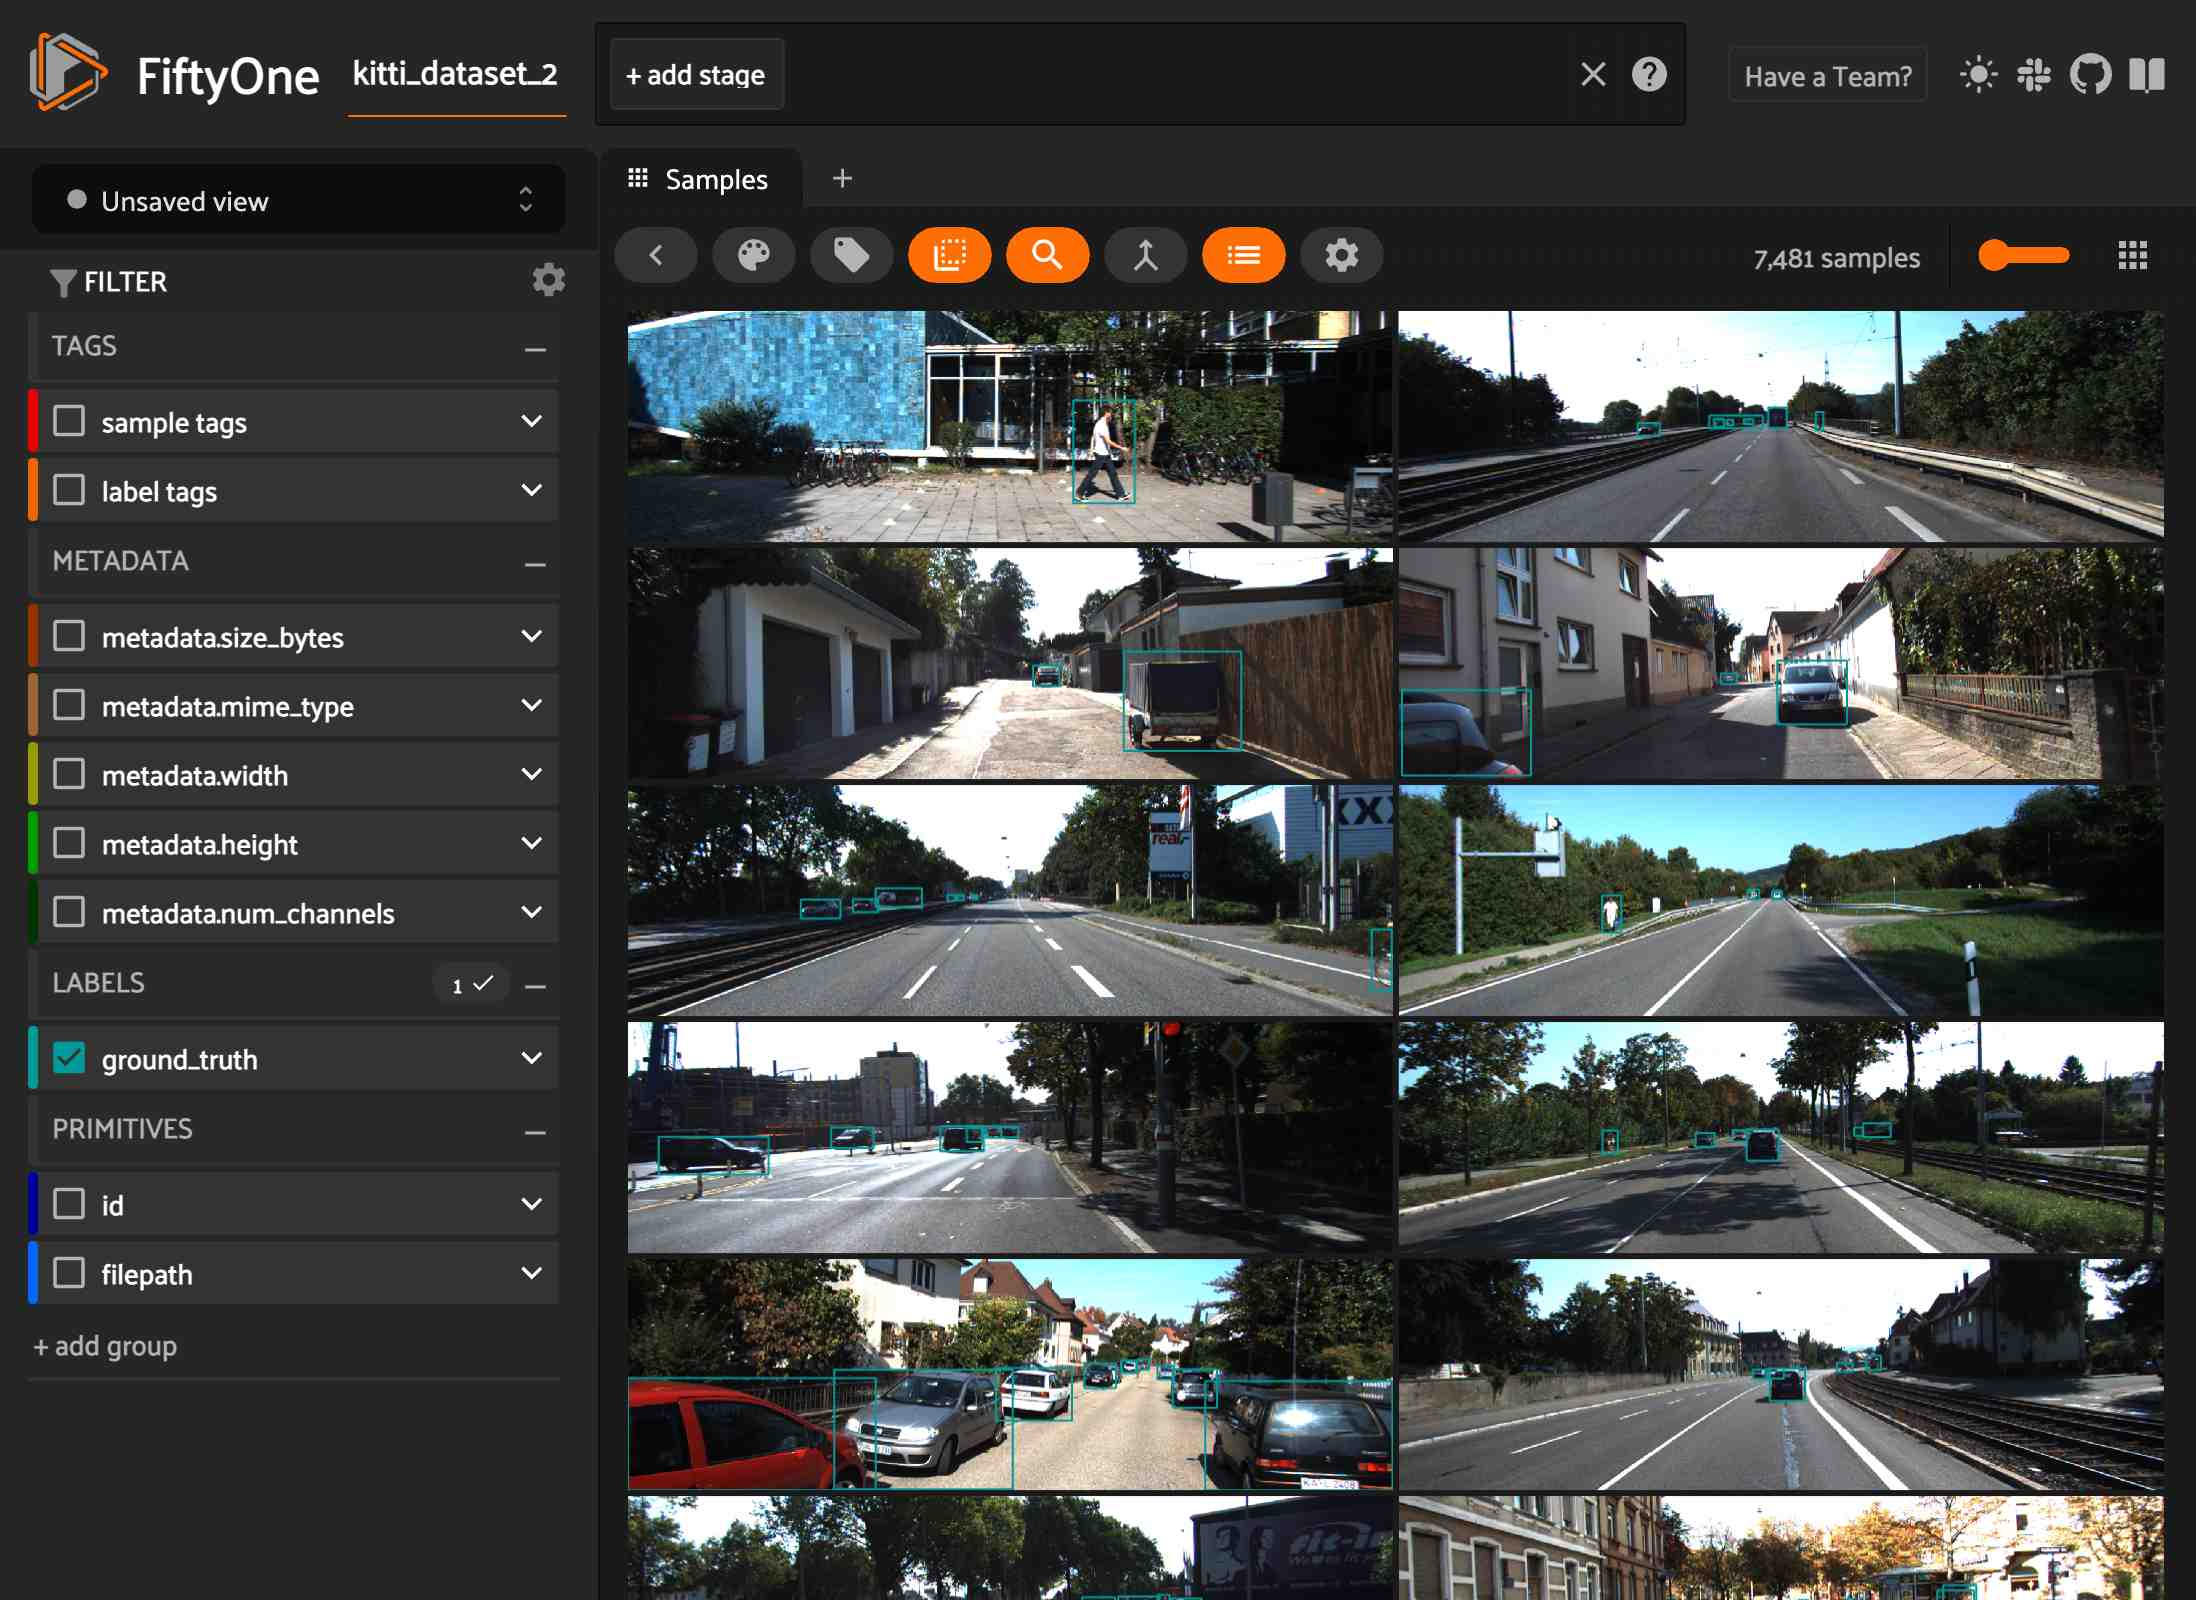

In [14]:
import fiftyone.zoo as foz # importing the zoo and assigning it to a variable

# Load the KITTI train split into a FiftyOne dataset

dataset = foz.load_zoo_dataset("kitti", split="train")

# Name the dataset something unique, and assigning persistent as true so we can work with it later on too. 
dataset.name = "kitti_dataset_2"
dataset.persistent = True

# Visualize the dataset using the FiftyOne GUI 
session = fo.launch_app(dataset)

In [60]:
print(dataset)

Name:        kitti
Media type:  image
Num samples: 50
Persistent:  False
Tags:        []
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField


In [61]:
print(dataset.first())

<Sample: {
    'id': '6531c6a38db0eb0bf15fa2c0',
    'media_type': 'image',
    'filepath': '/Users/vidushimeel/fiftyone/kitti/train/data/002588.png',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': 874188,
        'mime_type': 'image/png',
        'width': 1242,
        'height': 375,
        'num_channels': 3,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '6531c6a38db0eb0bf15fa2b2',
                'attributes': {},
                'tags': [],
                'label': 'Car',
                'bounding_box': [
                    0.46306763285024155,
                    0.46136,
                    0.14603059581320452,
                    0.4563733333333333,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'truncated': 0.0,
                'occluded': 0,
                'alpha': -1.61,
                'dim

## Create a new view with just cars showing

In [62]:
from fiftyone import ViewField as F # Used to write view expressions that involve sample fields

view = dataset.filter_labels("ground_truth", F("label") == "Pedestrian")




In [63]:
# Print summary information about the view
print(view)

Dataset:     kitti
Media type:  image
Num samples: 9
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField
View stages:
    1. FilterLabels(field='ground_truth', filter={'$eq': ['$$this.label', 'Pedestrian']}, only_matches=True, trajectories=False)



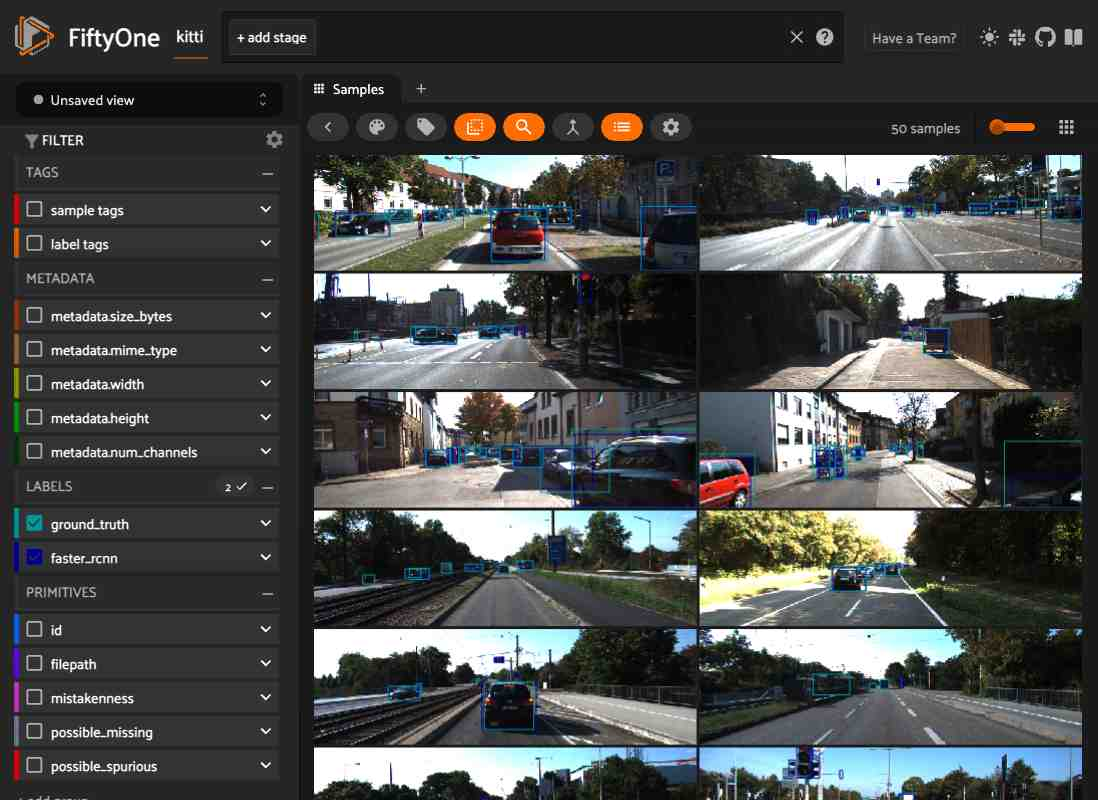

In [64]:
session = fo.launch_app(dataset)


### find duplicates

In [65]:
import fiftyone.brain as fob

Computing embeddings...
 100% |███████████████████| 50/50 [1.4s elapsed, 0s remaining, 36.5 samples/s]         
Computing uniqueness...
Uniqueness computation complete



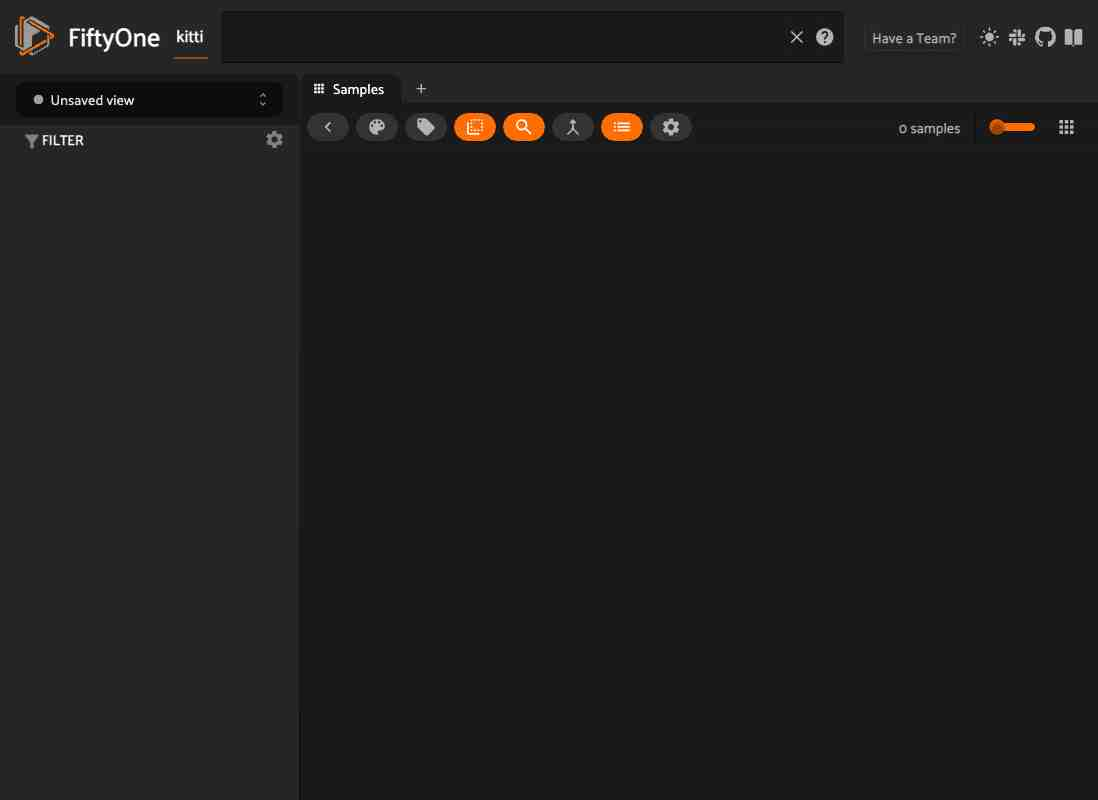

In [66]:
fob.compute_uniqueness(dataset)
# Sort in increasing order of uniqueness (least unique first)
dups_view = dataset.sort_by("uniqueness")
# Open view in the App
session.view = dups_view



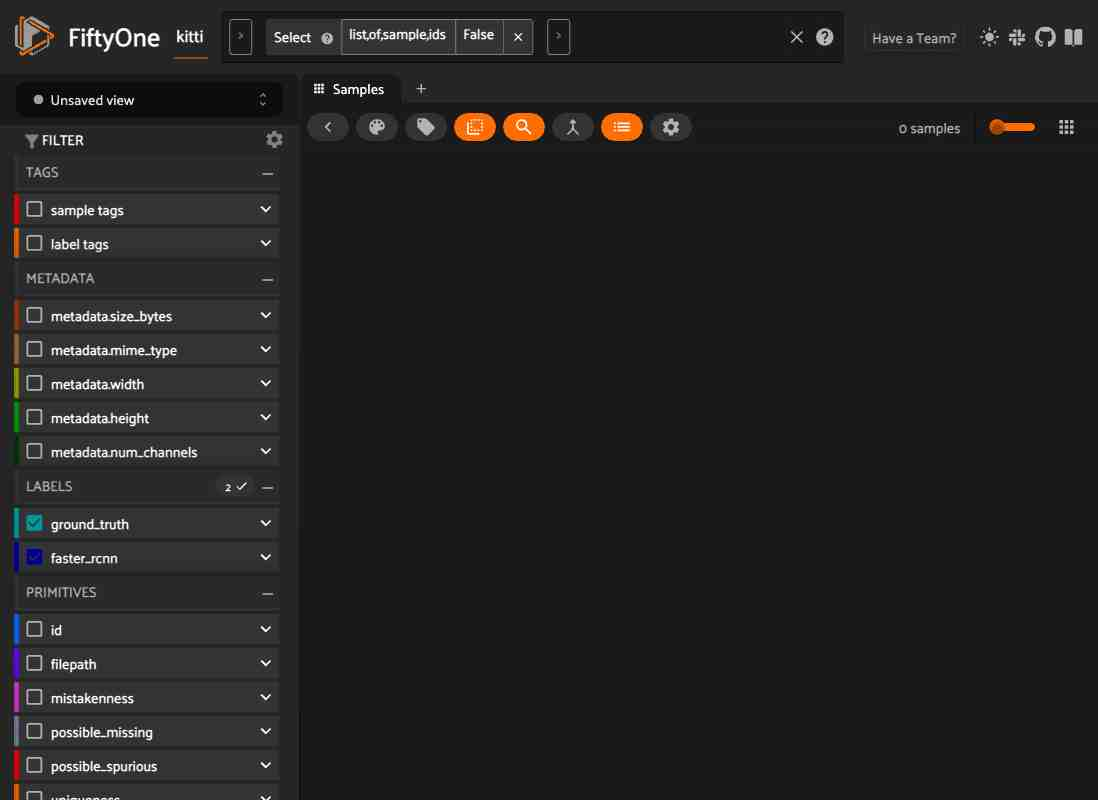

In [67]:
# Get currently selected images from App
dup_ids = session.selected
# Mark as duplicates
dups_view = dataset.select(dup_ids)
dups_view.tag_samples("dups")
# Visualize duplicates-only in App
session.view = dups_view

# Part 2
## check dataset type

In [68]:
!fiftyone zoo datasets info kitti

***** Dataset description *****
KITTI contains a suite of vision tasks built using an autonomous
driving platform.

This dataset contains the left camera images and the associated 2D object
detections.

The training split contains 7,481 annotated images, and the test split
contains 7,518 unlabeled images.

A full description of the annotations can be found in the README of the
object development kit on the KITTI homepage.

Example usage::

    import fiftyone as fo
    import fiftyone.zoo as foz

    dataset = foz.load_zoo_dataset("kitti", split="train")

    session = fo.launch_app(dataset)

Dataset size
    12.57 GB

Source
    http://www.cvlibs.net/datasets/kitti

***** Tags *****
image, detection

***** Supported splits *****
train, test

***** Dataset location *****
/Users/vidushimeel/fiftyone/kitti

***** Dataset info *****
{
    "name": "kitti",
    "zoo_dataset": "fiftyone.zoo.datasets.base.KITTIDataset",
    "dataset_type": "fiftyone.types.dataset_types.KITTIDetectionDataset",

## save as new view 

In [24]:
clean_view = dataset.sort_by("uniqueness").match_tags("dups", bool=False)
export_dir = "~/Downloads/Voxel51/new_dataset"
label_field = "ground_truth"  

for idx, sample in enumerate(dataset):
    sample["ground_truth"] = fo.Detections(label=str(idx))
    sample.save() # Export the dataset

clean_view.export(
    export_dir=export_dir,
    dataset_type=fo.types.KITTIDetectionDataset,
    label_field="ground_truth",
)


 100% |███████████████| 7481/7481 [11.9s elapsed, 0s remaining, 618.1 samples/s]      


## see all models

In [25]:
model_names = foz.list_zoo_models()
print(model_names)


['alexnet-imagenet-torch', 'centernet-hg104-1024-coco-tf2', 'centernet-hg104-512-coco-tf2', 'centernet-mobilenet-v2-fpn-512-coco-tf2', 'centernet-resnet101-v1-fpn-512-coco-tf2', 'centernet-resnet50-v1-fpn-512-coco-tf2', 'centernet-resnet50-v2-512-coco-tf2', 'clip-vit-base32-torch', 'deeplabv3-cityscapes-tf', 'deeplabv3-mnv2-cityscapes-tf', 'deeplabv3-resnet101-coco-torch', 'deeplabv3-resnet50-coco-torch', 'densenet121-imagenet-torch', 'densenet161-imagenet-torch', 'densenet169-imagenet-torch', 'densenet201-imagenet-torch', 'dinov2-vitb14-torch', 'dinov2-vitg14-torch', 'dinov2-vitl14-torch', 'dinov2-vits14-torch', 'efficientdet-d0-512-coco-tf2', 'efficientdet-d0-coco-tf1', 'efficientdet-d1-640-coco-tf2', 'efficientdet-d1-coco-tf1', 'efficientdet-d2-768-coco-tf2', 'efficientdet-d2-coco-tf1', 'efficientdet-d3-896-coco-tf2', 'efficientdet-d3-coco-tf1', 'efficientdet-d4-1024-coco-tf2', 'efficientdet-d4-coco-tf1', 'efficientdet-d5-1280-coco-tf2', 'efficientdet-d5-coco-tf1', 'efficientdet-d6-

In [ ]:
!eta install models

Split 'train' already downloaded
Loading existing dataset 'kitti'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
 100% |███████████████████| 50/50 [30.3s elapsed, 0s remaining, 1.7 samples/s]      
Dataset:     kitti
Media type:  image
Num samples: 50
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField
View stages:
   


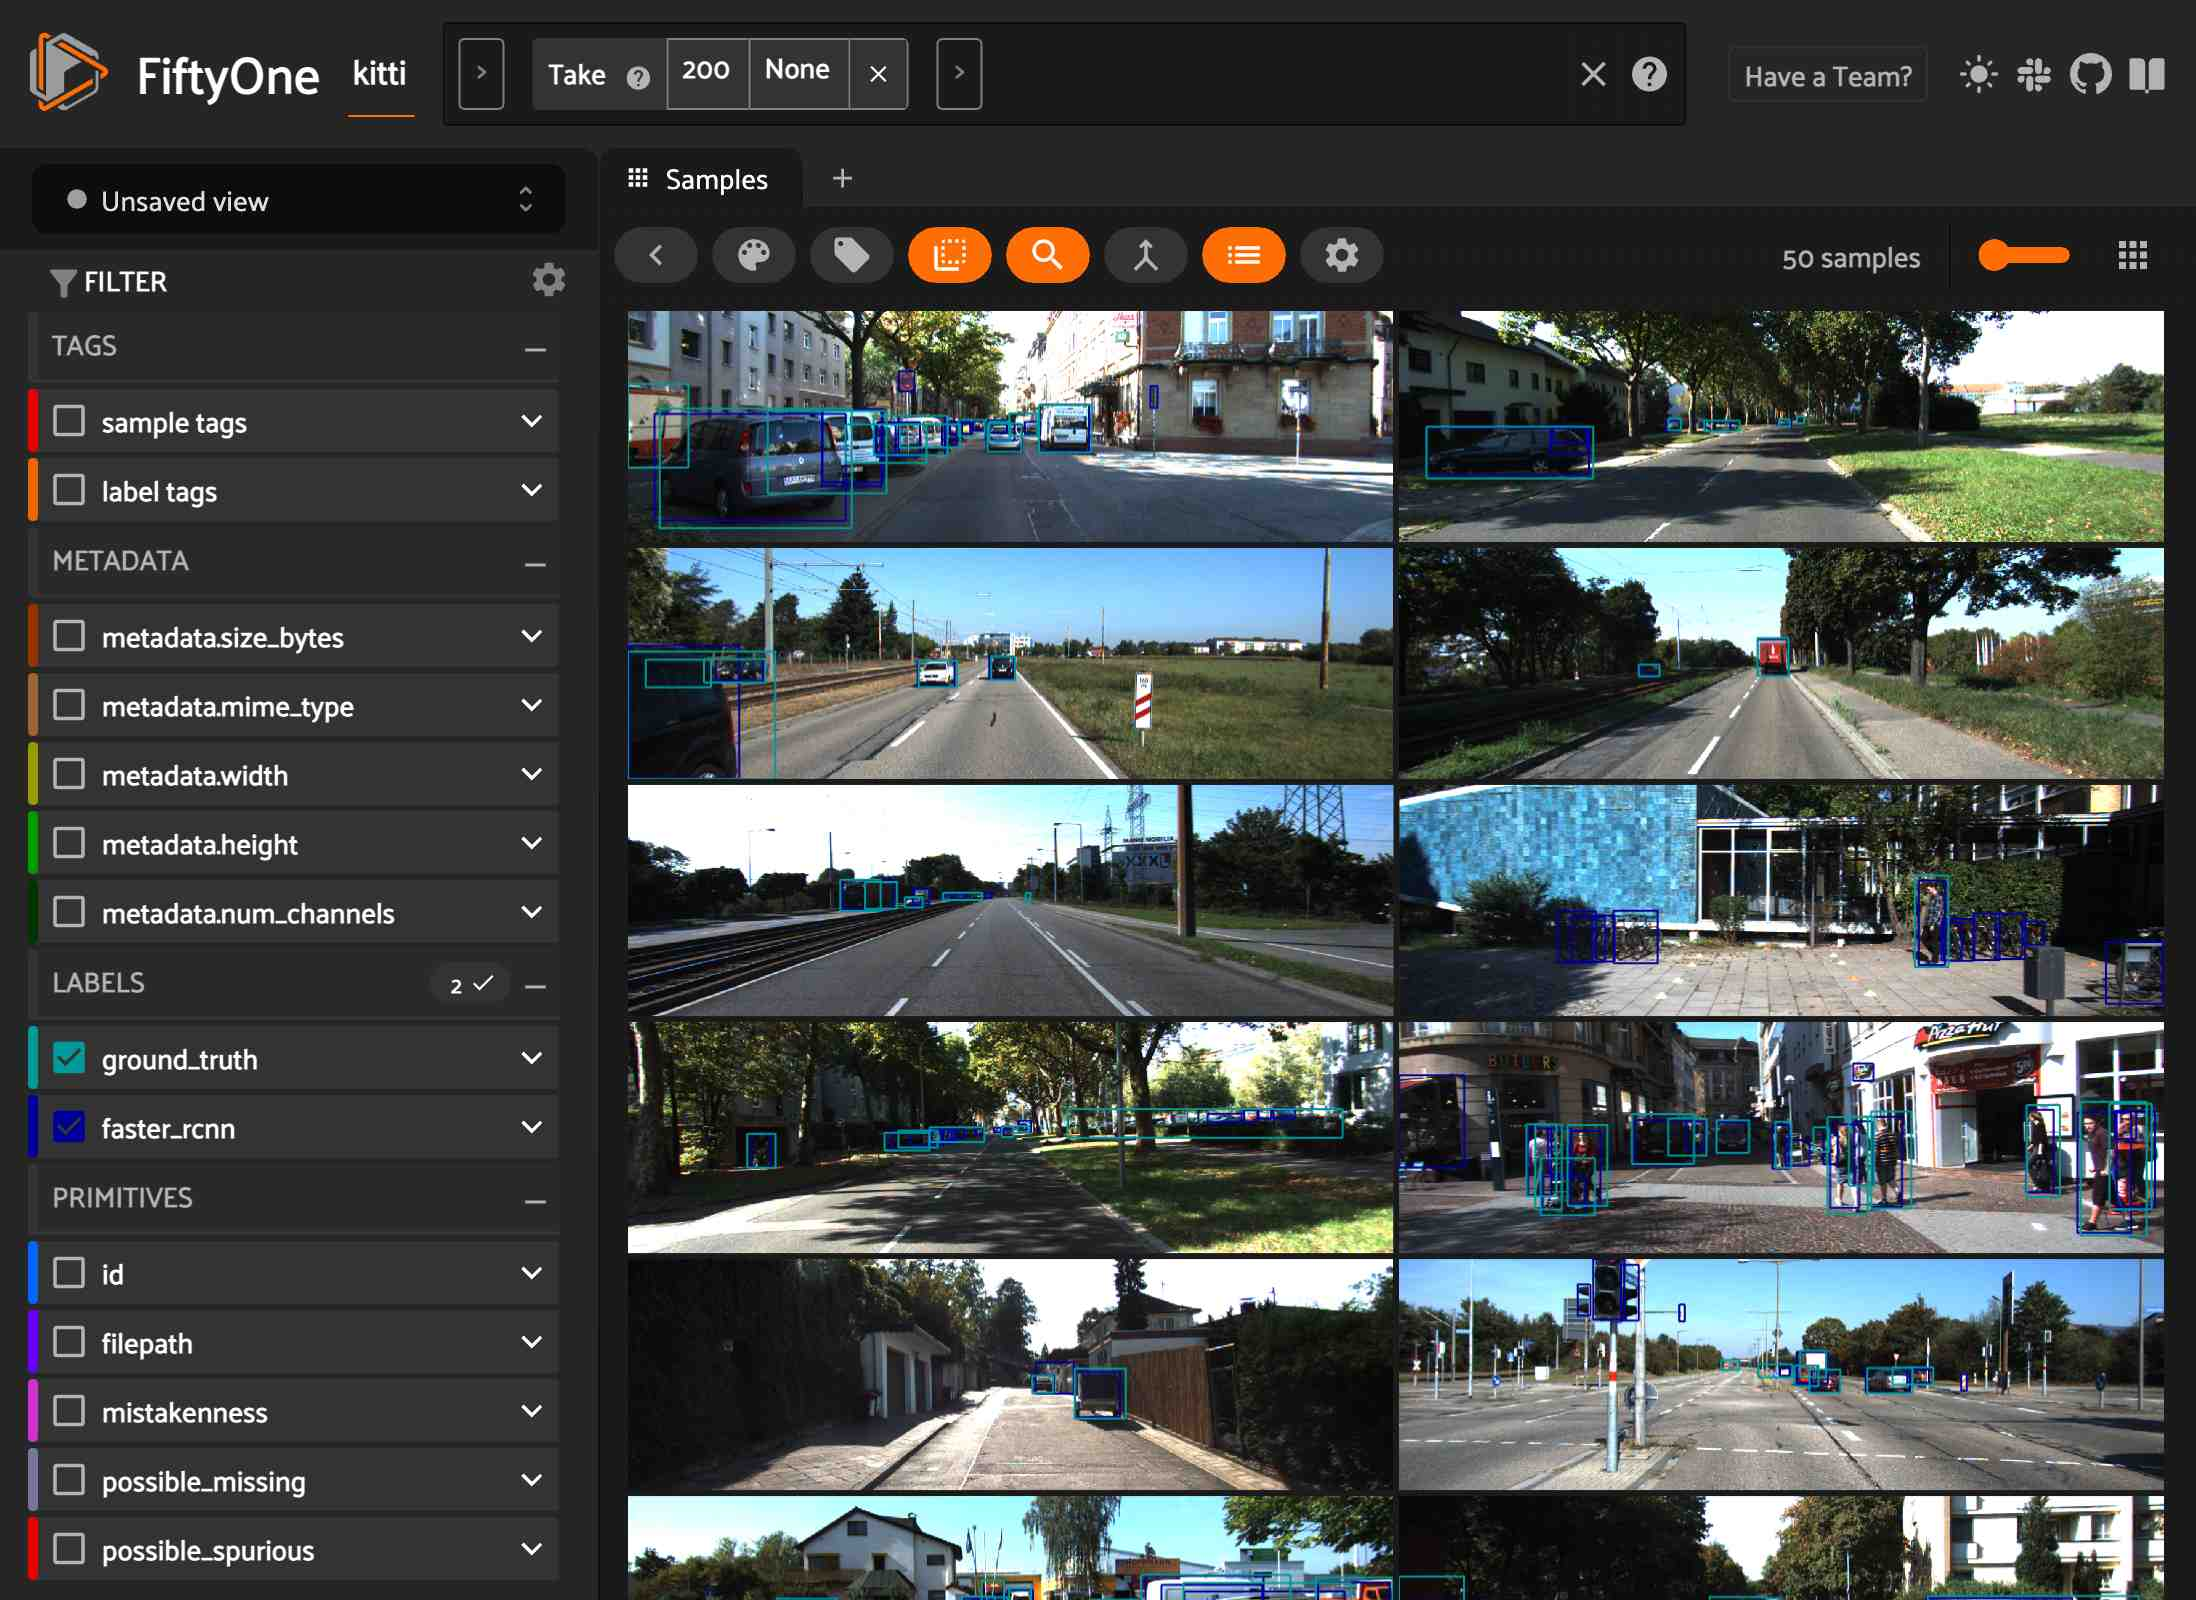

In [37]:

# Load zoo model

model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")

# Load some samples from the kitti dataset
dataset = foz.load_zoo_dataset(
    "kitti",
    split="train",
    dataset_name="kitti",
    max_samples=200,
    shuffle=True,
)

# Choose some samples to process. This can be the entire dataset, or a
# subset of the dataset. In this case, we'll choose some samples at random

samples = dataset.take(50)

# Generate predictions for each sample and store the results in the
# `faster_rcnn` field of the dataset, discarding all predictions with
# confidence below 0.5

samples.apply_model(model, label_field="faster_rcnn", confidence_thresh=0.5)
print(samples)

# Visualize predictions in the App
session = fo.launch_app(view=samples)

In [50]:
model_name = "faster_rcnn"
# Compute mistakenness
fob.compute_mistakenness(dataset, model_name, label_field="ground_truth")


Evaluating detections...
 100% |███████████████████| 50/50 [790.4ms elapsed, 0s remaining, 63.3 samples/s]      
Computing mistakenness...
 100% |███████████████████| 50/50 [449.7ms elapsed, 0s remaining, 111.2 samples/s]      
Mistakenness computation complete


In [70]:
# Sort by likelihood of mistake (most likely first)
mistake_view = (dataset
    .match_tags("train")
    .sort_by("mistakenness", reverse=True)
)

# Print some information about the view
print(mistake_view)
print(mistake_view.head())


Dataset:     kitti
Media type:  image
Num samples: 50
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField
    uniqueness:        fiftyone.core.fields.FloatField
View stages:
    1. MatchTags(tags=['train'], bool=True, all=False)
    2. SortBy(field_or_expr='mistakenness', reverse=True, create_index=True)
[<SampleView: {
    'id': '6531c6a48db0eb0bf15fa456',
    'media_t


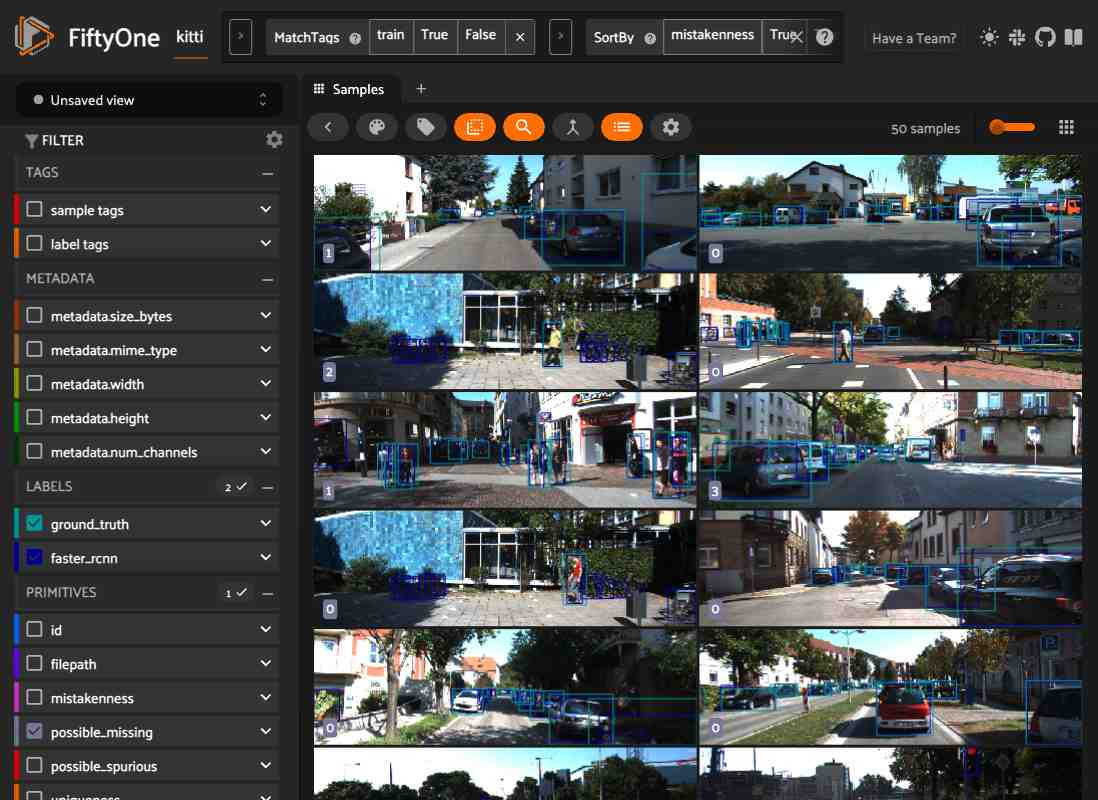

In [71]:
session.view = mistake_view



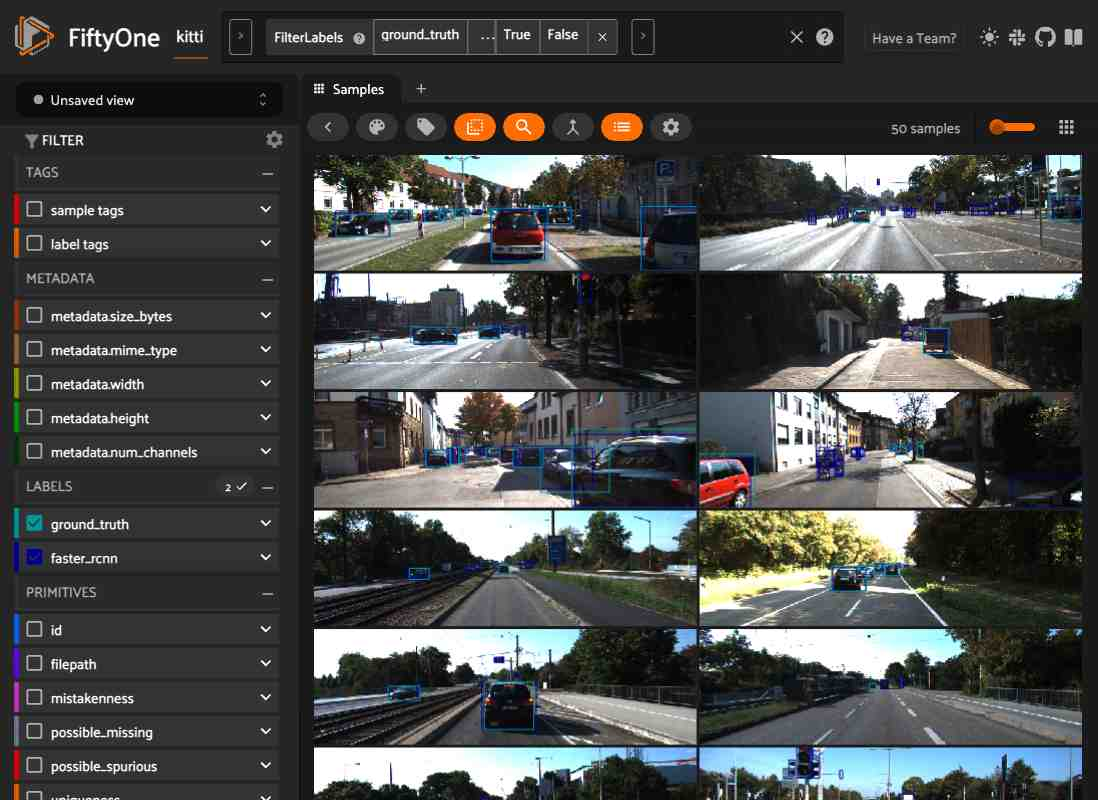

In [72]:
session.view = dataset.filter_labels("ground_truth", F("mistakenness") > 0.95)


In [53]:
session.view = dataset.match(F("possible_missing") > 0)
